# NEISS, Part 2 (this class)

* **Dataset:** `neiss2017.tsv` (kind of) - NEISS, again! But an old one, because the newer one is too nice.
* **Source:** https://www.cpsc.gov/Research--Statistics/NEISS-Injury-Data
* **Topics:**
    - filtering with `.str.contains` and simple anchored regular expressions
    - pulling out text with `.str.extract`
    - pandas display options
    - joining/merging tables
    - datetime parsing and manipulation

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("cleaned.csv")
df.shape

(386906, 20)

## 1) Let's only take out punchers

* After we learn this, what else can we do?

In [3]:
punches = df[df.Narrative_1.str.contains("PUNCH")]
punches.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight,Age_Deci
0,170100733,01/01/2017,21,Male,White,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641,21.0
32,170102931,01/01/2017,26,Male,Not Stated,NaN,82.0,59.0,NaN,1.0,1.0,0.0,1892.0,0.0,26YOM LAC HAND- PUNCHED GLASS DOOR,NaN,M,14.0,87.0904,26.0
94,170104156,01/01/2017,26,Male,Not Stated,NaN,33.0,59.0,NaN,1.0,0.0,0.0,1894.0,0.0,26 YR OLD MALE PUNCHED GLASS WINDOW AND LAC FO...,NaN,V,38.0,16.1828,26.0
135,170106135,01/01/2017,25,Male,Black,NaN,33.0,59.0,NaN,1.0,0.0,0.0,1892.0,0.0,25YOM PUNCHED A GLASS DOOR AND CUT HIS FOREARM.,DX. LAC. FOREARM.,S,29.0,77.6641,25.0
170,170106272,01/02/2017,26,Female,Black,NaN,34.0,57.0,NaN,1.0,1.0,0.0,1884.0,0.0,"26YOF WITH FRACTURED WRIST, PUNCHED A WALL",NaN,V,61.0,16.1828,26.0


In [4]:
punches.Sex.value_counts()

Male      3015
Female    1010
Name: Sex, dtype: int64

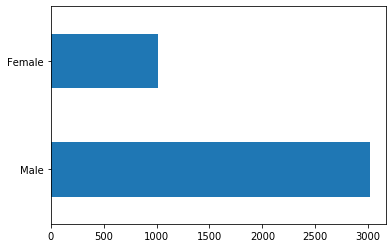

In [5]:
punches.Sex.value_counts().plot(kind='barh')

In [6]:
punches.Narrative_1.head()

0      21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...
32                    26YOM LAC HAND- PUNCHED GLASS DOOR
94     26 YR OLD MALE PUNCHED GLASS WINDOW AND LAC FO...
135      25YOM PUNCHED A GLASS DOOR AND CUT HIS FOREARM.
170           26YOF WITH FRACTURED WRIST, PUNCHED A WALL
Name: Narrative_1, dtype: object

In [7]:
pd.set_option("display.max_colwidth",200)
punches.Narrative_1.head()

0      21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE
32                                          26YOM LAC HAND- PUNCHED GLASS DOOR
94                         26 YR OLD MALE PUNCHED GLASS WINDOW AND LAC FOREARM
135                            25YOM PUNCHED A GLASS DOOR AND CUT HIS FOREARM.
170                                 26YOF WITH FRACTURED WRIST, PUNCHED A WALL
Name: Narrative_1, dtype: object

In [10]:
punches.Narrative_1.str.extract("PUNCHED (.*)").dropna()

,0
0,IN THE FACE
32,GLASS DOOR
94,GLASS WINDOW AND LAC FOREARM
135,A GLASS DOOR AND CUT HIS FOREARM.
170,A WALL
665,GLASS WINDOW WITH HAND. ETOH.
666,GLASS DOOR WITH HAND. ETOH. LWOT.
902,FENCE: DX CONTU HAN
907,A MIRROR: D
1050,A WALL W/ RIGHT HAND DX: OPEN WOUND OF HAND


In [16]:
codes = pd.read_csv("neiss_fmt.txt", sep='\t')
codes = codes[codes['Format name'] == 'PROD']
codes['Starting value for format'] = codes['Starting value for format'].astype(str).str.zfill(4)
codes['Ending value for format'] = codes['Ending value for format'].astype(str).str.zfill(4)
codes.head()

,Format name,Starting value for format,Ending value for format,Format value label
112,PROD,0101,0101,101 - WASHING MACHINES WITHOUT WRINGERS OR OTHER DRYERS
113,PROD,0102,0102,102 - WRINGER WASHING MACHINES
114,PROD,0103,0103,103 - WASHING MACHINES WITH UNHEATED SPIN DRYERS
115,PROD,0106,0106,106 - ELECTRIC CLOTHES DRYERS WITHOUT WASHERS
116,PROD,0107,0107,107 - GAS CLOTHES DRYERS WITHOUT WASHERS


In [ ]:
merged = punches.merge(codes)

## 2) Let's only take out _wall_ punchers

* After we learn this, what else can we do?

## 3) What month do people punch walls in?

* After we learn this, what else can we do?

## 4) What else do people punch?

* After we learn this, what else can we do?